#### Alaska is a Python package that reads mnemonics from LAS files and outputs an aliased dictionary of mnemonics and its aliases, as well as a list of mnemonics that cannot be found. It uses three different methods to find aliases to mnemonics: locates exact matches of a mnemonic in an alias dictionary, identifies keywords in mnemonics' description then returns alias from the keyword extractor, and predicts alias using all attributes of the curves.

## Example Usage

In [11]:
from alaska import Alias, get_data_path
from welly import Project
import lasio
import pandas as pd
%matplotlib inline

path = get_data_path("722319B.las")
a = Alias()
parsed, not_found = a.parse(path)
print("*"*10,"Aliased dictionary","*"*10)
for i in parsed:
    print("{}: {}".format(i,parsed[i]))
print("Not parsed with Aliaser:", not_found)

Reading 17 mnemonics...
Alasing with dictionary...
Aliased 10 mnemonics with dictionary
Alasing with keyword extractor...
Aliased 3 mnemonics with keyword extractor
********** Aliased dictionary **********
depth: ['DEPT']
caliper: ['CALI']
density porosity: ['DPHI']
density correction: ['DRHO']
gamma ray: ['GR']
neutron porosity: ['NPHI']
photoelectric effect: ['PE']
bulk density: ['RHOB']
spontaneous potential: ['SP']
cable tension: ['TENS']
deep conductivity: ['HDCN']
deep resistivity: ['HDRS']
medium resistivity: ['HMRS']
Not parsed with Aliaser: ['dfl', 'fdsn', 'ndsn', 'nrat']


#### In this case, `parsed` is an aliased dictionary that contains mnemonics and its aliases, and `not_found` is the list of mnemonics that the aliaser did not find. Users can manually alias mnemonics in the `not_found` list and add them to the dictionary of aliased mnemonics. Parameters of the Alias class can be changed, and the defaults are the following

In [12]:
a = Alias(dictionary=True, keyword_extractor=True, model=False, prob_cutoff=0.5)

#### Users can choose which parser to use/not to use by setting the parsers to True/False. The prob_cutoff is the confidence the user wants the predictions made by model parser to have, which is between 0 and 1.
#### Then, the aliased mnemonics can be input into welly as demonstrated below.

In [13]:
p = Project.from_las(str(path))
data = p.df(keys=list(parsed.keys()), alias=parsed)
data

0it [00:00, ?it/s]C:\Users\jrp4932\AppData\Local\Continuum\anaconda3\envs\alaska\lib\site-packages\welly\well.py:193: FutureWarning: From v0.5 the default will be 'original', keeping whatever is used in the LAS file. If you want to force conversion to metres, change your code to use `index='m'`.
  warnings.warn(m, FutureWarning)
1it [00:01,  1.40s/it]


caliper  density porosity  density correction  \
UWI          Depth                                                      
490072231900 7.6200         NaN               NaN                 NaN   
             7.7724         NaN               NaN                 NaN   
             7.9248         NaN               NaN                 NaN   
             8.0772         NaN               NaN                 NaN   
             8.2296         NaN               NaN                 NaN   
...                         ...               ...                 ...   
             2997.0984   6.3619            0.0931              0.0943   
             2997.2508   6.3619            0.0931              0.0943   
             2997.4032   6.3619            0.0931              0.0943   
             2997.5556   6.3619            0.0931              0.0943   
             2997.7080   6.3619            0.0931              0.0943   

                        gamma ray  neutron porosity  photoelectric effect  \
UWI          Depth                                                          
490072231900 7.6200       37.0208               NaN                   NaN   
             7.7724       35.1827               NaN                   NaN   
             7.9248       36.6673               NaN                   NaN   
             8.0772       38.9767               NaN                   NaN   
             8.2296       38.3169               NaN                   NaN   
...                           ...               ...                   ...   
             2997.0984   106.1749            0.6239                3.0427   
             2997.2508   106.1749            0.6239                3.0426   
             2997.4032   106.1749            0.6239                3.0427   
             2997.5556   106.1749            0.6239                3.0430   
             2997.7080   106.1749            0.6239                3.0435   

                        bulk density  spontaneous potential  cable tension  \
UWI          Depth                                                           
490072231900 7.6200              NaN                    NaN      1066.8783   
             7.7724              NaN                    NaN      1066.8783   
             7.9248              NaN                    NaN      1066.8783   
             8.0772              NaN                    NaN      1066.8783   
             8.2296              NaN                    NaN      1066.8783   
...                              ...                    ...            ...   
             2997.0984        2.4963                78.7242      3506.7542   
             2997.2508        2.4963                78.7242      3442.3125   
             2997.4032        2.4963                78.7242      3345.8521   
             2997.5556        2.4963                78.7242      3230.3433   
             2997.7080        2.4963                78.7242      3140.3677   

                        deep conductivity  deep resistivity  \
UWI          Depth                                            
490072231900 7.6200                   NaN               NaN   
             7.7724                   NaN               NaN   
             7.9248                   NaN               NaN   
             8.0772                   NaN               NaN   
             8.2296                   NaN               NaN   
...                                   ...               ...   
             2997.0984                NaN               NaN   
             2997.2508                NaN               NaN   
             2997.4032                NaN               NaN   
             2997.5556                NaN               NaN   
             2997.7080                NaN               NaN   

                        medium resistivity  
UWI          Depth                          
490072231900 7.6200                    NaN  
             7.7724                    NaN  
             7.9248                    NaN  
            

The `Alias` class does most of the heavy lifting in `alaska` and has 5 unique keyword arguments. Three of them (`dictionary`, `keyword_extractor`, and `model`) are booleans that control the different mnemonic parsers. When they are set to `True` the class will parse using that method. For example, the arguments below will use all three parsers. The `prob_cutoff` keyword specifically controls the probability for the `model` parser keyword argument. 

In [14]:
a = Alias(dictionary=True, keyword_extractor=True, model=True, prob_cutoff=0.1)
parsed, not_found = a.parse(path)
print("*"*10,"Aliased dictionary","*"*10)
for i in parsed:
    print("{}: {}".format(i,parsed[i]))
print("Not parsed with Aliaser:", not_found)

Reading 17 mnemonics...
Alasing with dictionary...
Aliased 10 mnemonics with dictionary
Alasing with keyword extractor...
Aliased 3 mnemonics with keyword extractor
Alasing with pointer generator...
Reading dataset c:\Users\jrp4932\Documents\GitHub\alaska\alaska\data\mnem.gz... Reading dataset c:\Users\jrp4932\Documents\GitHub\alaska\alaska\data\input.gz... C:\Users\jrp4932\AppData\Local\Continuum\anaconda3\envs\alaska\lib\site-packages\torch\nn\functional.py:1625: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
Aliased 4 mnemonics with pointer generator
********** Aliased dictionary **********
depth: ['DEPT']
caliper: ['CALI']
density porosity: ['DPHI']
density correction: ['DRHO', 'NDSN']
gamma ray: ['GR']
neutron porosity: ['NPHI']
photoelectric effect: ['PE']
bulk density: ['RHOB']
spontaneous potential: ['SP']
cable tension: ['TENS']
deep conductivity: ['HDCN']
deep resi

The `dictionary` based parser can also take a custom dictionary in `json` or `csv` formats. This means you can load your own custom dictionary for your specific use case.

In [15]:
# load the custom dictionary example from alaska
custom_dict_path = str(get_data_path("crains.json"))
# instantiate the Alias class with the custom dict and no keyword extractor or model aliasing
a = Alias(dictionary=True, custom_dict=custom_dict_path, keyword_extractor=False, model=False)
parsed, not_found = a.parse(path)
print("*"*10,"Aliased dictionary","*"*10)
for i in parsed:
    print("{}: {}".format(i,parsed[i]))
print("Not parsed with Aliaser:", not_found)

Reading 17 mnemonics...
Alasing with dictionary...
Aliased 8 mnemonics with dictionary
********** Aliased dictionary **********
cal: ['CALI']
phid: ['DPHI']
dcor: ['DRHO']
gr: ['GR']
phin: ['NPHI']
pe: ['PE']
dens: ['RHOB']
sp: ['SP']
Not parsed with Aliaser: ['dept', 'dfl', 'fdsn', 'hdcn', 'hdrs', 'hmrs', 'ndsn', 'nrat', 'tens']


Additional methods in the `Alias` class include a heatmap of alised mnemonics to visualize the aliasing results.

Reading 17 mnemonics...
Alasing with dictionary...
Aliased 8 mnemonics with dictionary
Alasing with keyword extractor...
Aliased 3 mnemonics with keyword extractor
Alasing with pointer generator...
Reading dataset c:\Users\jrp4932\Documents\GitHub\alaska\alaska\data\mnem.gz... Reading dataset c:\Users\jrp4932\Documents\GitHub\alaska\alaska\data\input.gz... Aliased 6 mnemonics with pointer generator


<AxesSubplot:xlabel='mnem', ylabel='method'>

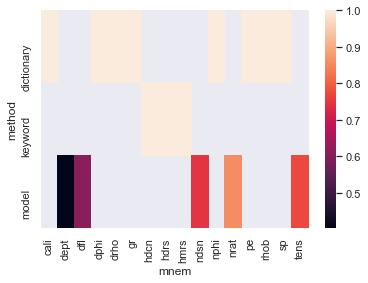

In [16]:
# create a new instance using all the parsers
a = Alias(dictionary=True, custom_dict=custom_dict_path, keyword_extractor=True, model=True, prob_cutoff=0.1)
# parse the mnemonics in the LAS file
parsed, not_found = a.parse(path)
# plot the heatmap of probability for each mnemonic
a.heatmap()

One final method in the `Alias` class is the `add_to_dictionary` method that will add aliases to the `alaska` comprehensive dictionary that comes with the package. This way you can rely more on the faster dictionary lookup the more you use the package. You can also specify a new path to save your the aliases as a `csv` table. 

In [7]:
# create a new instance using keyword extraction and the pointer generator model
a = Alias(dictionary=False, keyword_extractor=False, model=True, prob_cutoff=0.7)
# parse the mnemonics in the LAS file
parsed, not_found = a.parse(path)
a.add_to_dictionary(path="custom_dictionary.csv")

Reading 17 mnemonics...
Alasing with pointer generator...
Reading dataset c:\Users\jrp4932\Documents\GitHub\alaska\alaska\data\mnem.gz... Reading dataset c:\Users\jrp4932\Documents\GitHub\alaska\alaska\data\input.gz... Aliased 17 mnemonics with pointer generator


In [8]:
parsed

{'density correction': ['NDSN', 'HDRS', 'RHOB'],
 'temperature correction': ['DRHO'],
 'density porosity': ['DPHI'],
 'gamma natural': ['GR'],
 'caliper in': ['CALI'],
 'neutron porosity': ['NPHI'],
 'spectral gamma': ['NRAT']}

In [9]:
custom_dictionary_view = pd.read_csv("custom_dictionary.csv")
custom_dictionary_view

,mnemonics,label
0,TENS,CABLE TENSION
1,BIT,BIT SIZE
2,ACAL,CALIPER
3,C1,CALIPER
4,C13,CALIPER
...,...,...
1279,DCAV_RT,DENSITY CORRECTION
1280,DCAV_WDP,DENSITY CORRECTION
1281,NDSN,DENSITY CORRECTION
1282,HDRS,DENSITY CORRECTION
